In [38]:
# a project submitted to Great Learning " Python for Machine Learning Course" by Er. Hari K.C.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,classification_report,roc_curve,accuracy_score,auc

In [3]:
# the data is stored in Download folder
df = pd.read_csv("Downloads/Diabetes.csv")

In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
#first fifty data
df.head(50)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [7]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [8]:
col=['n_pregnant','glucose_conc','bp','skin_len','insulin','bmi','pedigree_fun','age','Output']
df.columns=col
df.head()

,n_pregnant,glucose_conc,bp,skin_len,insulin,bmi,pedigree_fun,age,Output
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [44]:
df.describe()  # to find different statistics

,n_pregnant,glucose_conc,bp,skin_len,insulin,bmi,pedigree_fun,age,Output
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.677083,72.389323,29.089844,141.753906,32.434635,0.471876,32.037760,0.348958
std,3.369578,30.464161,12.106039,8.890820,89.100847,6.880498,0.331329,10.104919,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,102.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,28.000000,102.500000,32.050000,0.372500,28.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,169.500000,36.600000,0.626250,39.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,61.000000,1.000000


In [46]:
df.head().corr()   # finding the correlation between different factors.

,n_pregnant,glucose_conc,bp,skin_len,insulin,bmi,pedigree_fun,age,Output
n_pregnant,1.000000,0.797993,0.509708,0.352159,0.574423,-0.473810,-0.288684,0.493862,0.563547
glucose_conc,0.797993,1.000000,-0.104300,0.683982,0.910527,0.030986,0.334031,0.483465,0.911585
bp,0.509708,-0.104300,1.000000,-0.345834,-0.307352,-0.738771,-0.926860,0.216797,-0.322832
skin_len,0.352159,0.683982,-0.345834,1.000000,0.900898,0.533654,0.654568,0.797416,0.872872
insulin,0.574423,0.910527,-0.307352,0.900898,1.000000,0.404132,0.598264,0.675198,0.996883
bmi,-0.473810,0.030986,-0.738771,0.533654,0.404132,1.000000,0.852934,0.295061,0.422899
pedigree_fun,-0.288684,0.334031,-0.926860,0.654568,0.598264,0.852934,1.000000,0.159455,0.606669
age,0.493862,0.483465,0.216797,0.797416,0.675198,0.295061,0.159455,1.000000,0.646147
Output,0.563547,0.911585,-0.322832,0.872872,0.996883,0.422899,0.606669,0.646147,1.000000


In [50]:
df.head().hist()   # to display the histogram

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024347D24518>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000243483A15C0>]], dtype=object)

In [9]:
# to find how many are diabetics and not in number.
diabetes_true_count = len(df.loc[df['Output'] == True])
diabetes_false_count = len(df.loc[df['Output'] == False])
(diabetes_true_count,diabetes_false_count)

(268, 500)

In [10]:
# replacing 0 with NAN
col=['glucose_conc','bp','insulin','bmi','skin_len']
for i in col:
    df[i].replace(0, np.nan, inplace= True)

In [11]:
df.isnull().sum()

n_pregnant        0
glucose_conc      5
bp               35
skin_len        227
insulin         374
bmi              11
pedigree_fun      0
age               0
Output            0
dtype: int64

In [12]:
def median_target(var):   
    temp = df[df[var].notnull()]
    temp = temp[[var, 'Output']].groupby(['Output'])[[var]].median().reset_index()
    return temp

In [13]:
median_target('insulin')

,Output,insulin
0,0,102.5
1,1,169.5


In [14]:
median_target('glucose_conc')

,Output,glucose_conc
0,0,107.0
1,1,140.0


In [15]:
median_target('bp')

,Output,bp
0,0,70.0
1,1,74.5


In [16]:
median_target('skin_len')

,Output,skin_len
0,0,27.0
1,1,32.0


In [17]:
median_target('bmi')

,Output,bmi
0,0,30.1
1,1,34.3


In [18]:
##Filling the NaN value with Median according to Output

df.loc[(df['Output'] == 0 ) & (df['insulin'].isnull()), 'insulin'] = 102.5
df.loc[(df['Output'] == 1 ) & (df['insulin'].isnull()), 'insulin'] = 169.5
df.loc[(df['Output'] == 0 ) & (df['glucose_conc'].isnull()), 'glucose_conc'] = 107
df.loc[(df['Output'] == 1 ) & (df['glucose_conc'].isnull()), 'glucose_conc'] = 140
df.loc[(df['Output'] == 0 ) & (df['skin_len'].isnull()), 'skin_len'] = 27
df.loc[(df['Output'] == 1 ) & (df['skin_len'].isnull()), 'skin_len'] = 32
df.loc[(df['Output'] == 0 ) & (df['bp'].isnull()), 'bp'] = 70
df.loc[(df['Output'] == 1 ) & (df['bp'].isnull()), 'bp'] = 74.5
df.loc[(df['Output'] == 0 ) & (df['bmi'].isnull()), 'bmi'] = 30.1
df.loc[(df['Output'] == 1 ) & (df['bmi'].isnull()), 'bmi'] = 34.3

In [19]:
df.isnull().sum()

n_pregnant      0
glucose_conc    0
bp              0
skin_len        0
insulin         0
bmi             0
pedigree_fun    0
age             0
Output          0
dtype: int64

In [25]:


plt.style.use('ggplot') # Using ggplot2 style visuals 

f, ax = plt.subplots(figsize=(11, 15))

ax.set_facecolor('#fafafa')
ax.set(xlim=(-.05, 200))
plt.ylabel('Variables')
plt.title("Overview Data Set")
ax = sns.boxplot(data = df, 
  orient = 'h', 
  palette = 'Set2')

In [26]:
sns.boxplot(df.n_pregnant)

In [27]:
df.loc[(df['Output'] == 0 ) & (df['age']>61), 'age'] = 27
df.loc[(df['Output'] == 1 ) & (df['age']>61), 'age'] = 36

In [28]:
X = df.drop(['Output'], 1)
y = df['Output']

In [29]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [30]:
std = StandardScaler()
x_train = std.fit_transform(x_train)
x_test = std.transform(x_test)

In [35]:
#support vector Classification with kernel Radial basis function
model=SVC(kernel='rbf')
model.fit(x_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [36]:
y_pred=model.predict(x_test)

In [39]:
accuracy_score(y_test,y_pred)

0.83766233766233766

In [40]:
confusion_matrix(y_test,y_pred)

array([[94, 13],
       [12, 35]])

In [41]:
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.89      0.88      0.88       107
          1       0.73      0.74      0.74        47

avg / total       0.84      0.84      0.84       154



AUC: 0.81


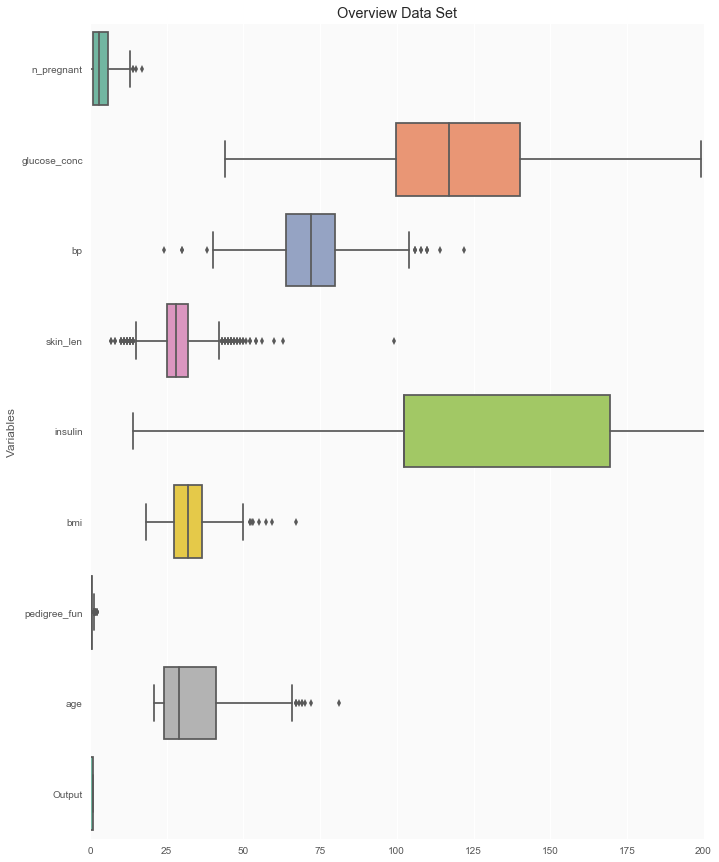

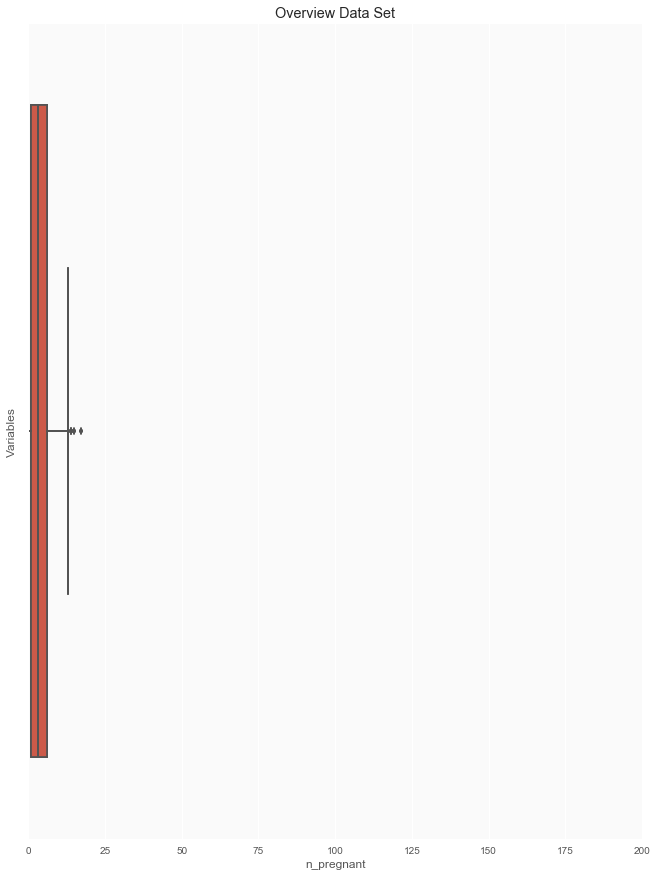

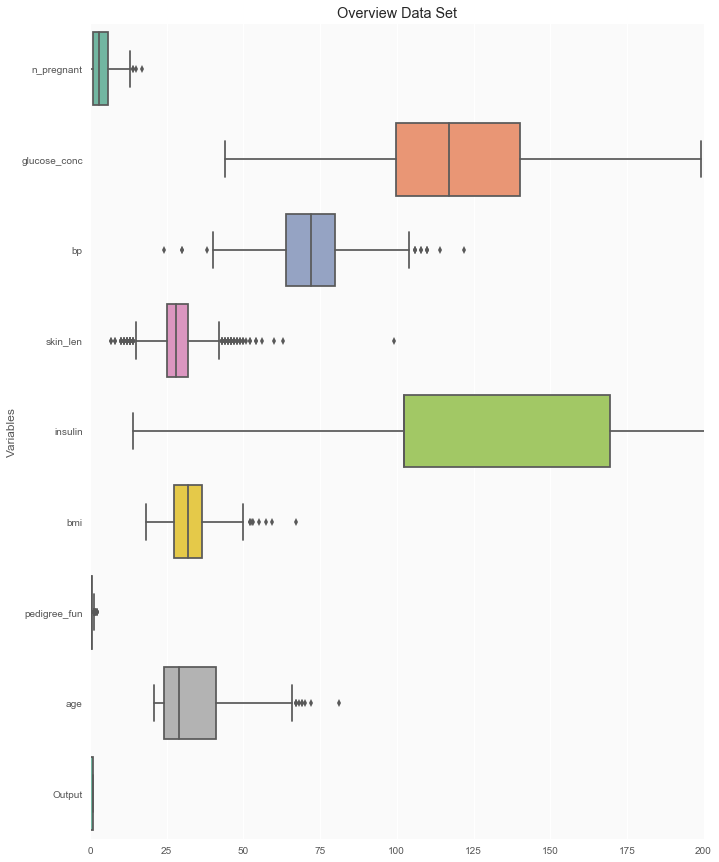

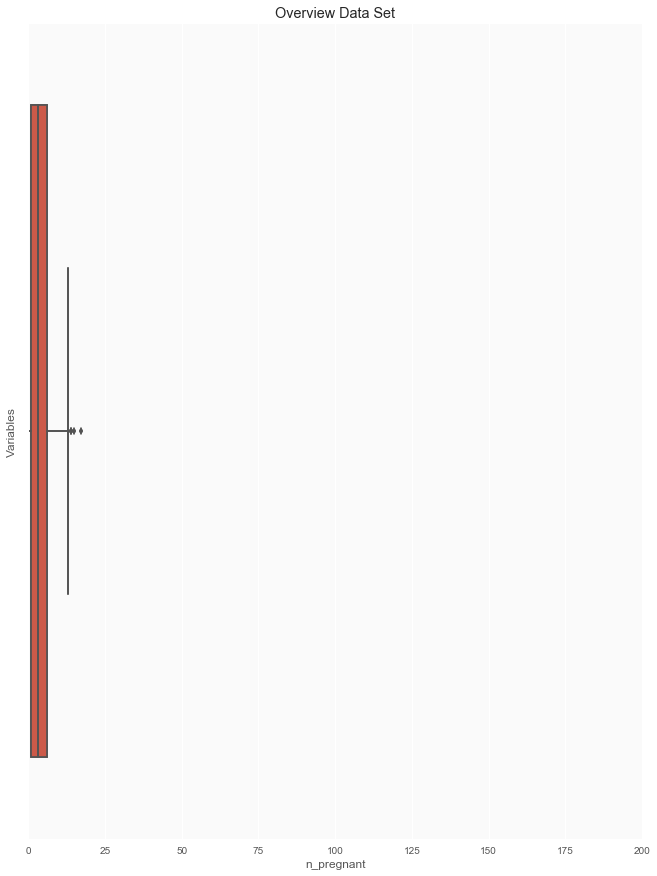

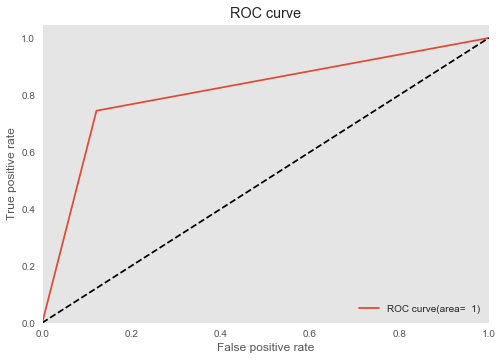

In [42]:
fpr,tpr,_=roc_curve(y_test,y_pred)
#calculate AUC
roc_auc=auc(fpr,tpr)
print('AUC: %0.2f' % roc_auc)
#plot of ROC curve for a specified class
plt.figure()
plt.plot(fpr,tpr,label='ROC curve(area= %2.f)' %roc_auc)
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

 Thank you. 

submitted date: 2020 April 11